Required libraries

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install regex
!pip3 install tensorflow
!pip3 install keras

##Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import math
import tensorflow as tf

##Importing and preparing the dataset

In [2]:
dataset = pd.read_csv('Load Profiles.csv')
dataset

,Date/Time,Heating/Cooling,Fans,InteriorLights,ExteriorLights,InteriorEquipment,Misc : InteriorEquipment
0,01/01 01:00:00,0.249108,0.048803,0.061268,0.011206,2.826843,0.315209
1,01/01 02:00:00,0.286937,0.056214,0.035740,0.006537,3.130111,0.290224
2,01/01 03:00:00,0.313726,0.061462,0.025528,0.004669,3.371758,0.286859
3,01/01 04:00:00,0.336854,0.065993,0.025528,0.004669,3.607986,0.282821
4,01/01 05:00:00,0.358424,0.070219,0.025528,0.004669,3.888659,0.272138
...,...,...,...,...,...,...,...
8755,12/31 20:00:00,0.098779,0.019352,0.295776,0.054100,2.069969,0.501625
8756,12/31 21:00:00,0.105840,0.020735,0.269368,0.049269,2.015142,0.518871
8757,12/31 22:00:00,0.112770,0.022093,0.227114,0.041541,1.967728,0.506757
8758,12/31 23:00:00,0.129033,0.025279,0.169015,0.030914,1.971973,0.438533


In [3]:
Total = []
for row in dataset.to_numpy():
    Total.append(np.sum(row[1:]))

In [4]:
x = []
for el in dataset['Date/Time']:
    match = re.match(r'^ ([0-9]{2})\/([0-9]{2})  ([0-9]{2})', el)
    x.append([int(match[2]), int(match[1]), int(match[3])])    

##Splitting the dataset into training and test sets

In [5]:
x = np.array(x)
y = np.array(Total)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

##ANN Model 1
Adam optimizer

In [7]:
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the layers
ann.add(tf.keras.layers.Dense(units=8, input_shape=(3,), activation=tf.nn.relu))
ann.add(tf.keras.layers.Dense(units=8, activation=tf.nn.relu))
ann.add(tf.keras.layers.Dense(units=1, activation=tf.nn.relu))

# Defining the Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the ANN
ann.compile(optimizer = optimizer, loss = 'mean_squared_error')

# Training the ANN on the Training set
hist_ann = ann.fit(x_train, y_train, epochs = 50)

Epoch 1/50
206/206 [==============================] - 1s 1ms/step - loss: 3.9873
Epoch 2/50
206/206 [==============================] - 0s 1ms/step - loss: 3.1621
Epoch 3/50
206/206 [==============================] - 0s 1ms/step - loss: 2.9068
Epoch 4/50
206/206 [==============================] - 0s 1ms/step - loss: 2.2192
Epoch 5/50
206/206 [==============================] - 0s 1ms/step - loss: 2.0242
Epoch 6/50
206/206 [==============================] - 0s 1ms/step - loss: 1.9431
Epoch 7/50
206/206 [==============================] - 0s 1ms/step - loss: 1.8232
Epoch 8/50
206/206 [==============================] - 0s 1ms/step - loss: 1.7631
Epoch 9/50
206/206 [==============================] - 0s 1ms/step - loss: 1.7118
Epoch 10/50
206/206 [==============================] - 0s 1ms/step - loss: 1.6252
Epoch 11/50
206/206 [==============================] - 0s 1ms/step - loss: 1.5311
Epoch 12/50
206/206 [==============================] - 0s 1ms/step - loss: 1.4548
Epoch 13/50
206/206 [====

In [9]:
print(ann.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 32        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
None


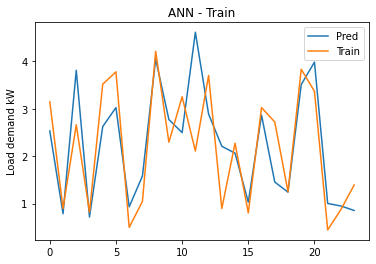

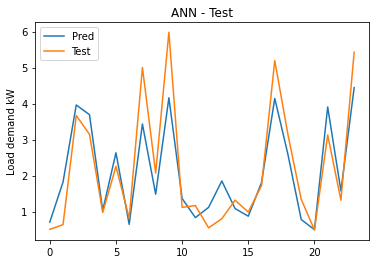

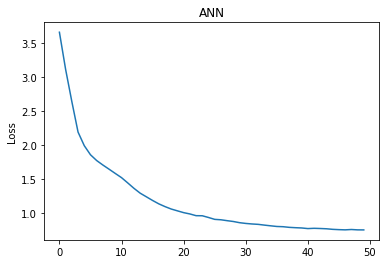

R2 Score :  0.7273596749216684
Adjusted R2 Score :  0.726985511621012
MAE :  0.6208850903814264
MSE :  0.7548655867576599


In [8]:
# Predicting the Test set results

plt.plot(ann.predict(x_train)[:24])
plt.plot(y_train[:24])
plt.legend(('Pred', 'Train'))
plt.ylabel('Load demand kW')
plt.title('ANN - Train')
plt.show()

y_pred = ann.predict(x_test)
plt.plot(y_pred[:24])
plt.plot(y_test[:24])
plt.legend(('Pred', 'Test'))
plt.ylabel('Load demand kW')
plt.title('ANN - Test')
plt.show()

plt.plot(hist_ann.history['loss'])
plt.ylabel('Loss')
plt.title('ANN')
plt.show()

r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)
adj_r2 = 1 - (1-r2)*(len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1)
print("Adjusted R2 Score : ", adj_r2)
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MSE : ", hist_ann.history['loss'][-1])

##ANN Model 2
Stocastic Gradient Descent Optimizer

In [11]:
# Initializing the ANN
ann_sgd = tf.keras.models.Sequential()

# Adding the layers
ann_sgd.add(tf.keras.layers.Dense(units=8, input_shape=(3,), activation=tf.nn.relu))
ann_sgd.add(tf.keras.layers.Dense(units=8, activation=tf.nn.relu))
ann_sgd.add(tf.keras.layers.Dense(units=1, activation=tf.nn.relu))

# Defining the Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.8)

# Compiling the ANN
ann_sgd.compile(optimizer = optimizer, loss = 'mean_squared_error')

# Training the ANN on the Training set
hist_sgd = ann_sgd.fit(x_train, y_train, epochs = 50)

Epoch 1/50
206/206 [==============================] - 1s 1ms/step - loss: 6.4704
Epoch 2/50
206/206 [==============================] - 0s 1ms/step - loss: 2.2452
Epoch 3/50
206/206 [==============================] - 0s 1ms/step - loss: 2.0825
Epoch 4/50
206/206 [==============================] - 0s 1ms/step - loss: 1.8353
Epoch 5/50
206/206 [==============================] - 0s 1ms/step - loss: 1.7434
Epoch 6/50
206/206 [==============================] - 0s 1ms/step - loss: 1.6865
Epoch 7/50
206/206 [==============================] - 0s 1ms/step - loss: 1.5941
Epoch 8/50
206/206 [==============================] - 0s 1ms/step - loss: 1.4830
Epoch 9/50
206/206 [==============================] - 0s 1ms/step - loss: 1.3517
Epoch 10/50
206/206 [==============================] - 0s 1ms/step - loss: 1.3640
Epoch 11/50
206/206 [==============================] - 0s 1ms/step - loss: 1.2516
Epoch 12/50
206/206 [==============================] - 0s 1ms/step - loss: 1.2068
Epoch 13/50
206/206 [====

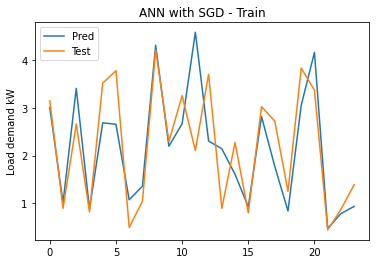

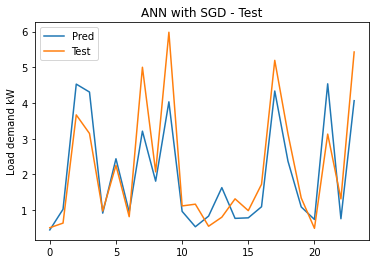

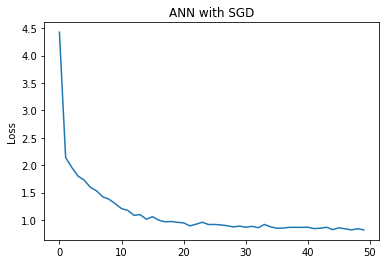

R2 Score :  0.6915341579637481
Adjusted R2 Score :  0.6911108288118227
MAE :  0.6319727711968943
MSE :  0.7548655867576599


In [12]:
# Predicting the Test set results

plt.plot(ann_sgd.predict(x_train)[:24])
plt.plot(y_train[:24])
plt.legend(('Pred', 'Test'))
plt.ylabel('Load demand kW')
plt.title('ANN with SGD - Train')
plt.show()

y_pred = ann_sgd.predict(x_test)
plt.plot(y_pred[:24])
plt.plot(y_test[:24])
plt.legend(('Pred', 'Test'))
plt.ylabel('Load demand kW')
plt.title('ANN with SGD - Test')
plt.show()

plt.plot(hist_sgd.history['loss'])
plt.ylabel('Loss')
plt.title('ANN with SGD')
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)
adj_r2 = 1 - (1-r2)*(len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1)
print("Adjusted R2 Score : ", adj_r2)
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MSE : ", hist_ann.history['loss'][-1])

##ANN Model 3
RMSprop Optimizer

In [14]:
# Initializing the ANN
ann_rmsprop = tf.keras.models.Sequential()

# Adding the input layer and the first hidden layer
ann_rmsprop.add(tf.keras.layers.Dense(units=8, input_shape=(3,), activation=tf.nn.relu))
ann_rmsprop.add(tf.keras.layers.Dense(units=8, activation=tf.nn.relu))
ann_rmsprop.add(tf.keras.layers.Dense(units=1, activation=tf.nn.relu))

# Defining the Optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

# Compiling the ANN
ann_rmsprop.compile(optimizer = optimizer, loss = 'mean_squared_error')

# Training the ANN on the Training set
hist_rmsprop = ann_rmsprop.fit(x_train, y_train, epochs = 50)

Epoch 1/50
206/206 [==============================] - 1s 1ms/step - loss: 3.7299
Epoch 2/50
206/206 [==============================] - 0s 1ms/step - loss: 1.9375
Epoch 3/50
206/206 [==============================] - 0s 1ms/step - loss: 1.4382
Epoch 4/50
206/206 [==============================] - 0s 1ms/step - loss: 1.1945
Epoch 5/50
206/206 [==============================] - 0s 1ms/step - loss: 1.1465
Epoch 6/50
206/206 [==============================] - 0s 1ms/step - loss: 1.0210
Epoch 7/50
206/206 [==============================] - 0s 1ms/step - loss: 1.0412
Epoch 8/50
206/206 [==============================] - 0s 1ms/step - loss: 0.9607
Epoch 9/50
206/206 [==============================] - 0s 1ms/step - loss: 0.8940
Epoch 10/50
206/206 [==============================] - 0s 1ms/step - loss: 0.8781
Epoch 11/50
206/206 [==============================] - 0s 1ms/step - loss: 0.8886
Epoch 12/50
206/206 [==============================] - 0s 1ms/step - loss: 0.8095
Epoch 13/50
206/206 [====

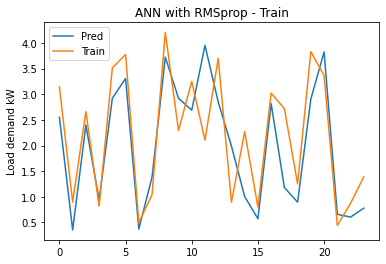

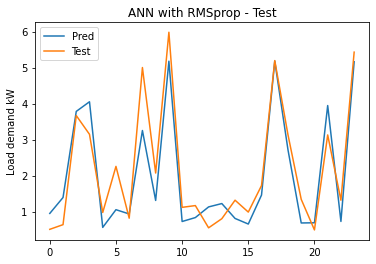

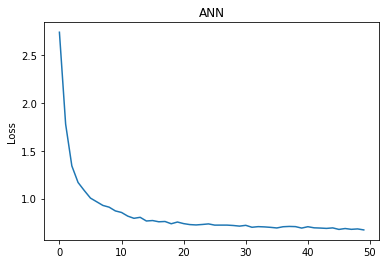

R2 Score :  0.718894990817137
Adjusted R2 Score :  0.7185092108411313
MAE :  0.6236139740264169
MSE :  0.7548655867576599


In [15]:
# Predicting the Test set results

plt.plot(ann_rmsprop.predict(x_train)[:24])
plt.plot(y_train[:24])
plt.legend(('Pred', 'Train'))
plt.ylabel('Load demand kW')
plt.title('ANN with RMSprop - Train')
plt.show()

y_pred = ann_rmsprop.predict(x_test)
plt.plot(y_pred[:24])
plt.plot(y_test[:24])
plt.legend(('Pred', 'Test'))
plt.ylabel('Load demand kW')
plt.title('ANN with RMSprop - Test')
plt.show()

plt.plot(hist_rmsprop.history['loss'])
plt.ylabel('Loss')
plt.title('ANN')
plt.show()

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score : ", r2)
adj_r2 = 1 - (1-r2)*(len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1)
print("Adjusted R2 Score : ", adj_r2)
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MSE : ", hist_ann.history['loss'][-1])